In [1]:
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.metrics import r2_score
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import f1_score,accuracy_score

In [2]:
df = pd.read_csv("/content/drive/MyDrive/501 Final Project/code/data/ml.csv")

In [3]:
attr_cat = []
for index , row in df.iterrows():
  if(row['attrition_percentage'] <= 10):
    attr_cat.append(0)
  elif(row['attrition_percentage'] <= 30):
    attr_cat.append(1)
  else:
    attr_cat.append(2)
df['attr_cat'] = attr_cat

In [4]:
df['attr_cat'].value_counts()

0    623
1    335
2     56
Name: attr_cat, dtype: int64

In [5]:
df.drop(df.loc[df['masking_level']==-1].index, inplace=True)
attr = df['attrition_percentage']
df = df.drop(['attrition_percentage' , 'nct_id'] , axis=1)
df = df.drop(['gender'] , axis= 1)
attr_cat_o = df['attr_cat'] 
df = df.drop(['attr_cat'] , axis=1)

In [6]:
df.head()

,phase,allocation,intervention_model,primary_purpose,intervention_type,arm_group_type,healthy_vols,location_count,min_age_cat,max_age_cat,pt_mask,masking_level,date_diff_num
0,Phase 2,Randomized,Parallel Assignment,Treatment,Drug,Active Comparator,No,1,teen,late adult,Yes,4,3895
1,Phase 2,Randomized,Parallel Assignment,Treatment,Drug,Placebo Comparator,No,1,child,teen,Yes,4,4901
2,Phase 3,Randomized,Parallel Assignment,Treatment,Drug,Experimental,No,1,teen,late adult,Yes,2,3318
3,Phase 3,Randomized,Parallel Assignment,Treatment,Drug,Active Comparator,No,408,teen,late adult,No,0,2587
4,Phase 3,Randomized,Parallel Assignment,Screening,Device,Experimental,Accepts Healthy Volunteers,33,adult,adult,No,0,2983


In [7]:
df_temp = df

In [8]:
len(attr_cat_o)

965

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(df_temp, attr_cat_o, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (772, 13)
Y_train shape:  (772,)
X_test shape:  (193, 13)
Y_test shape:  (193,)


In [10]:
numerical_features = ['date_diff_num' , 'location_count']
categorical_features = [ 'allocation','intervention_model' , 'primary_purpose' , 'intervention_type' , 'arm_group_type'  , 'healthy_vols' , 'pt_mask']
age_cat = ['infant' , 'child' , 'teen' , 'adult' , 'late adult' ]
phase_cat = ['Phase 1.5','Phase 2' , 'Phase 2.5' , 'Phase 3' , 'Phase 4']
masking_level = [0,1,2,3,4]


In [11]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[ ("onehot", OneHotEncoder(handle_unknown="error" ,drop="if_binary"))]
)

ordinal_age_transformer = Pipeline(
    steps=[("ordinal_age", OrdinalEncoder(categories = [age_cat] , handle_unknown='error' )  )]
)


ordinal_phase_transformer = Pipeline(
    steps=[("ordinal_phase", OrdinalEncoder(categories = [phase_cat] , handle_unknown='error' )  )]
)

ordinal_masking_transformer = Pipeline(
    steps=[("ordinal_mask", OrdinalEncoder(categories = [masking_level] , handle_unknown='error' )  )]
)



In [12]:
col_transformer = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features),
        ("oe_min_age" , ordinal_age_transformer , ['min_age_cat' ]),
        ("oe_max_age" , ordinal_age_transformer , ['max_age_cat']),
        ("oe_phase" , ordinal_phase_transformer , ['phase']),
        ("oe_masking" , ordinal_masking_transformer, ['masking_level'])
    ],
    remainder='passthrough'
)

In [13]:
columns = ['date_diff_num',
 'location_count',
 'allocation_Randomized',
 'intervention_model_Crossover Assignment',
 'intervention_model_Factorial Assignment',
 'intervention_model_Parallel Assignment',
 'intervention_model_Single Group Assignment',
 'primary_purpose_Basic Science',
 'primary_purpose_Diagnostic',
 'primary_purpose_Health Services Research',
 'primary_purpose_Other',
 'primary_purpose_Prevention',
 'primary_purpose_Screening',
 'primary_purpose_Supportive Care',
 'primary_purpose_Treatment',
 'intervention_type_Biological',
 'intervention_type_Device',
 'intervention_type_Dietary Supplement',
 'intervention_type_Drug',
 'intervention_type_Other',
 'intervention_type_Radiation',
 'arm_group_type_Active Comparator',
 'arm_group_type_Experimental',
 'arm_group_type_Other',
 'arm_group_type_Placebo Comparator',
 'healthy_vols_No',
 'pt_mask_Yes',
 'min_age_cat',
 'max_age_cat',
 'phase',
 'masking_level']

In [14]:
dt_pipe = Pipeline(
    steps =[
        ("preprocessing" , col_transformer),
        ('classifier' ,DecisionTreeClassifier() )
    ]
)

In [15]:
dt_pipe.fit(X_train, Y_train)
dt_predictions = dt_pipe.predict(X_test)

print("First 5 DT predictions: ", list(dt_predictions[:5]))
print(accuracy_score(Y_test,dt_predictions))
print(f1_score(Y_test, dt_predictions , average="weighted"))
cnf_matrix_dt = metrics.confusion_matrix(Y_test, dt_predictions )


First 5 DT predictions:  [1, 0, 2, 0, 1]
0.45595854922279794
0.4653081601256641


In [16]:
target_names = ['low', 'medium' , 'high']
print(classification_report(Y_test, dt_predictions, target_names=target_names))

              precision    recall  f1-score   support

         low       0.62      0.57      0.60       126
      medium       0.24      0.28      0.26        57
        high       0.00      0.00      0.00        10

    accuracy                           0.46       193
   macro avg       0.29      0.28      0.29       193
weighted avg       0.48      0.46      0.47       193



Text(0.5, 257.44, 'Predicted label')

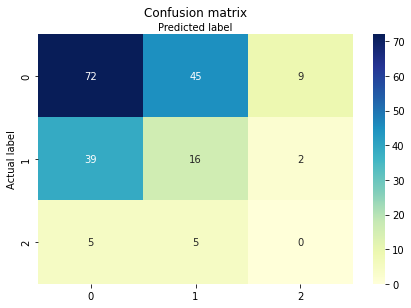

In [17]:
class_names=['low' , 'medium' , 'high'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [18]:
set_config(display='diagram')
dt_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['date_diff_num',
                                                   'location_count']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['allocation',
                                                   'intervention_model',
                                                   'primary_purpose',
                                                   'intervention_type',
                                                   'arm_group_type',
                                                   'h...
                                                                                               'teen',
                                                                                               'adult',
                                                                                               'late '
                                                                                               'adult']]))]),
                                                  ['max_age_cat']),
                                                 ('oe_phase',
                                                  Pipeline(steps=[('ordinal_phase',
                                                                   OrdinalEncoder(categories=[['Phase '
                                                                                               '1.5',
                                                                                               'Phase '
                                                                                               '2',
                                                                                               'Phase '
                                                                                               '2.5',
                                                                                               'Phase '
                                                                                               '3',
                                                                                               'Phase '
                                                                                               '4']]))]),
                                                  ['phase']),
                                                 ('oe_masking',
                                                  Pipeline(steps=[('ordinal_mask',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4]]))]),
                                                  ['masking_level'])])),
                ('classifier', DecisionTreeClassifier())])

In [54]:
lr_pipe = Pipeline(
    steps =[
        ("preprocessing" , col_transformer),
        ('classifier' ,LogisticRegression(random_state=16 , max_iter = 200,multi_class = 'auto' , solver = 'newton-cg') )
    ]
)

In [55]:
lr_pipe.fit(X_train, Y_train)
lr_predictions = lr_pipe.predict(X_test)

print("First 5 LR predictions: ", list(lr_predictions[:5]))
print(accuracy_score(Y_test,lr_predictions))
print(f1_score(Y_test, lr_predictions , average="weighted"))
cnf_matrix_lr = metrics.confusion_matrix(Y_test, lr_predictions )

First 5 LR predictions:  [0, 0, 0, 0, 0]
0.6373056994818653
0.5403599865861739


In [56]:
coefs = lr_pipe.steps[1][1].coef_


In [57]:
coefs

array([[-2.82016265e-02, -8.16602460e-03, -1.91769517e-01,
         5.89539617e-01, -5.44698883e-01,  2.15949626e-01,
        -2.60785838e-01,  3.95879252e-01,  1.93810699e-01,
        -4.62524812e-01,  1.06174772e-01, -3.42723279e-01,
         1.88592150e-01, -2.51989851e-01,  1.72785593e-01,
        -5.60702865e-02,  2.80273597e-01, -1.38667336e-01,
        -3.88312271e-01, -3.01494874e-01,  6.04275693e-01,
        -3.17229464e-01,  1.92107950e-01,  2.38646040e-01,
        -1.13520002e-01,  1.01465316e-02,  2.78381289e-01,
         3.83485610e-02, -2.13309373e-02,  5.76326918e-02,
        -4.04720906e-02],
       [ 8.62924381e-02,  4.11137935e-03,  1.28464131e-01,
        -6.27961716e-02,  4.32256869e-02, -8.61437569e-02,
         1.05706895e-01, -5.40865078e-02, -4.51507165e-02,
         4.96119608e-01, -5.80504637e-01, -3.69554440e-01,
        -1.64739017e-01,  5.90313943e-01,  1.27594421e-01,
         3.13794083e-01, -7.33715725e-02,  2.72515131e-01,
         1.09052732e-02, -1.25

In [58]:
coefs = np.exp(coefs)

In [59]:
coefs

array([[0.97219233, 0.99186723, 0.82549711, 1.80315808, 0.58001641,
        1.24103986, 0.7704459 , 1.48568991, 1.21386647, 0.62969178,
        1.11201621, 0.70983461, 1.20754835, 0.77725263, 1.18861123,
        0.94547268, 1.32349187, 0.87051757, 0.67820053, 0.73971162,
        1.8299263 , 0.72816365, 1.21180132, 1.26952909, 0.89268634,
        1.01019818, 1.32098978, 1.03909336, 0.97889496, 1.05932583,
        0.96033597],
       [1.09012508, 1.00411984, 1.13708063, 0.93913488, 1.04417352,
        0.91746233, 1.11149604, 0.94735015, 0.95585341, 1.64233598,
        0.55961589, 0.69104216, 0.84811502, 1.80455485, 1.13609213,
        1.36860789, 0.92925548, 1.31326333, 1.01096495, 0.98748013,
        0.59974462, 1.24493299, 1.11128051, 0.54217027, 1.33318812,
        0.98581155, 1.34832219, 0.96274829, 0.97922172, 1.05554236,
        1.00358356],
       [0.94356426, 1.00406288, 1.06535213, 0.59052492, 1.65115195,
        0.87826591, 1.16775014, 0.71049544, 0.86186211, 0.96696324,
      

In [60]:
zero_df = pd.DataFrame(coefs[0] , columns=['odds_ratio'])
zero_df['column'] = columns
zero_sorted = zero_df.sort_values('odds_ratio')


one_df = pd.DataFrame(coefs[1] , columns=['odds_ratio'])
one_df['column'] = columns
one_sorted = one_df.sort_values('odds_ratio')


two_df =pd.DataFrame(coefs[2] , columns=['odds_ratio'])
two_df['column'] = columns
two_sorted = two_df.sort_values('odds_ratio')

In [90]:

pd.concat([zero_sorted[:5] , zero_sorted[-5:]])

,odds_ratio,column
4,0.580016,intervention_model_Factorial Assignment
9,0.629692,primary_purpose_Health Services Research
18,0.678201,intervention_type_Drug
11,0.709835,primary_purpose_Prevention
21,0.728164,arm_group_type_Active Comparator
26,1.320990,pt_mask_Yes
16,1.323492,intervention_type_Device
7,1.485690,primary_purpose_Basic Science
3,1.803158,intervention_model_Crossover Assignment
20,1.829926,intervention_type_Radiation


In [91]:

pd.concat([one_sorted[:5] , one_sorted[-5:]])

,odds_ratio,column
23,0.542170,arm_group_type_Other
10,0.559616,primary_purpose_Other
20,0.599745,intervention_type_Radiation
11,0.691042,primary_purpose_Prevention
12,0.848115,primary_purpose_Screening
24,1.333188,arm_group_type_Placebo Comparator
26,1.348322,pt_mask_Yes
15,1.368608,intervention_type_Biological
9,1.642336,primary_purpose_Health Services Research
13,1.804555,primary_purpose_Supportive Care


In [92]:

pd.concat([two_sorted[:5] , two_sorted[-5:]])

,odds_ratio,column
26,0.561445,pt_mask_Yes
3,0.590525,intervention_model_Crossover Assignment
7,0.710495,primary_purpose_Basic Science
13,0.712964,primary_purpose_Supportive Care
14,0.740537,primary_purpose_Treatment
23,1.452853,arm_group_type_Other
18,1.458498,intervention_type_Drug
10,1.606937,primary_purpose_Other
4,1.651152,intervention_model_Factorial Assignment
11,2.038629,primary_purpose_Prevention


In [24]:
target_names = ['low', 'medium' , 'high']
print(classification_report(Y_test, lr_predictions, target_names=target_names))

              precision    recall  f1-score   support

         low       0.66      0.94      0.78       126
      medium       0.33      0.07      0.12        57
        high       0.00      0.00      0.00        10

    accuracy                           0.64       193
   macro avg       0.33      0.34      0.30       193
weighted avg       0.53      0.64      0.54       193



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 257.44, 'Predicted label')

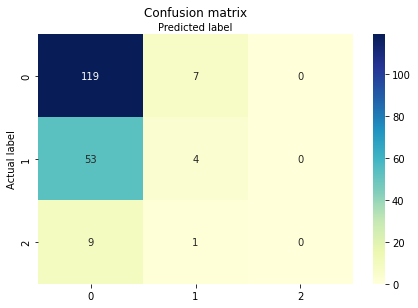

In [ ]:
class_names=['low' , 'medium' , 'high'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
svm_pipe = Pipeline(
    steps =[
        ("preprocessing" , col_transformer),
        ('classifier' ,svm.SVC(kernel = "linear") )
    ]
)

In [ ]:
svm_pipe.fit(X_train, Y_train)
svm_predictions = svm_pipe.predict(X_test)

print("First 5 LR predictions: ", list(svm_predictions[:5]))
print(accuracy_score(Y_test,svm_predictions))
print(f1_score(Y_test, svm_predictions , average="weighted"))
cnf_matrix_svm = metrics.confusion_matrix(Y_test, svm_predictions )

First 5 LR predictions:  [0, 0, 0, 0, 0]
0.6476683937823834
0.5148657262875729


In [ ]:
target_names = ['low', 'medium' , 'high']
print(classification_report(Y_test, svm_predictions, target_names=target_names))

              precision    recall  f1-score   support

         low       0.65      0.99      0.79       126
      medium       0.00      0.00      0.00        57
        high       0.00      0.00      0.00        10

    accuracy                           0.65       193
   macro avg       0.22      0.33      0.26       193
weighted avg       0.43      0.65      0.51       193



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 257.44, 'Predicted label')

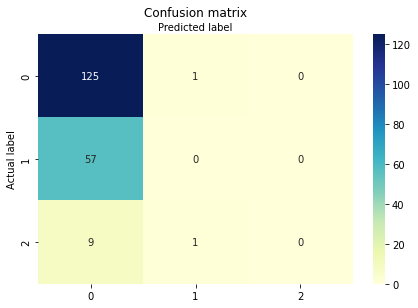

In [ ]:
class_names=['low' , 'medium' , 'high'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')